# Hashtag word clouds - Fake Covid-19 dataset

In order to create the word clouds, we need the following packages:

In [ ]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import itertools
import altair as alt
from matplotlib.colors import ListedColormap

To read the JSON file that has all the tweets, it is necessary to do:

In [ ]:
data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Terms regarding Covid

We have filtered all the hashtags and then we have calculated the frequency distribution:

In [ ]:
index_covid=0
cmt_list_covid = []
for element in data:
    for entity in data[index_covid]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        token_covid=entity['text']
        cmt_list_covid.append(token_covid)
        
    index_covid=index_covid+1
    
fdist_covid = dict(nltk.FreqDist(cmt_list_covid))

The hashtag word cloud is generated:

In [ ]:
mask_covid= np.array(Image.open('grafici/covid.jpg'))

a = ['#3C1067', '#075A23', '#44AA99', '#D55E00', '#AA4499', '#882255']
my_cmap = ListedColormap(a)

wordcloud_covid = WordCloud(
                    mask=mask_covid,
                    width=mask_covid.shape[1],
                    height=mask_covid.shape[0],
                    background_color ='white', 
                    min_word_length = 3,
                    max_words=500,
                    font_path = 'grafici/GothamMedium.ttf',
                    colormap=my_cmap).generate_from_frequencies(fdist_covid)

Plot the hashtag word cloud (WITH terms regarding Covid):

In [ ]:
# Plot the word cloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud_covid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.show()

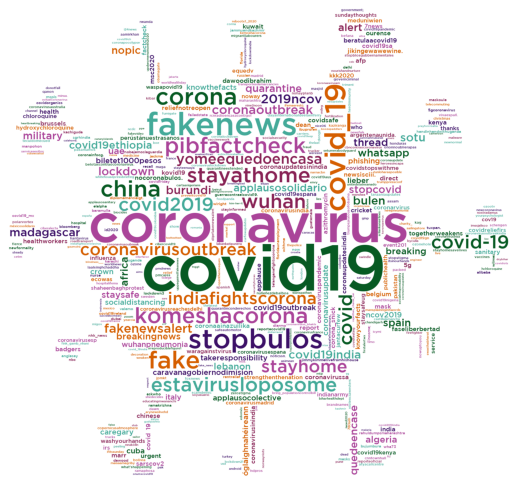

## Terms not regarding Covid

We have also filtered all the hashtags without terms regarding Covid and then have calculated the frequency distribution:

In [ ]:
index=0
cmt_list = []
stopwords = ["covid-19","coronavirusinindia","covidstopswithme","covid19kenya","stopbulos","coronavirusmadrid","coronavirusespana","coronavirusesp","waspapovid19","covidfriday","cov19","coronavirusreachesdelhi","covid19ethiopia","covidsafe","covid19espana","nocoronabulos.","nocoronabulos","covid19sa","coronaupdatesindia","beratulaacovid19","coronaainazuilika","corona_snick","kovid19","yomeequedoencasa","coronaupdatesinindia","quedeencase","covid19outbreak","covidreliefirs","stopcovid","stayathome","komeshacorona","mask","wuhan","estavirusloposome","waragainstvirus","staysafe","stayhome","influenza","chloroquine","staysafeug","socialdistancing","hydroxychloroquine","wuhanpneumonia","washyourhands","masks","coronawarriors","covid19australia","vaccine","coronacrisis","coronaviruskenya","covidiots","covid19uk","lockdownsa","covidiot","chinesevirus","pandemic","coronaviruslockdown","quarantinelife","sarscov2","coronalockdown","coronaupdate","covid19us","nomeat_nocoronavirus","covid19india","coronavirusupdate","quarantine","lockdown","chinavirus","coronaviruschina","coronavirusuk","wuhanvirus","coronavirusupdates","covid19pandemic","coronavirususa","covid19nigeria","coronaviruschina","coronarvirus","coronaoutbreak","ncov2019","2019ncov","chinacoronavirus","coronavirussa","wuhancoronavirus","coronarovirus","indiafightscorona","covid19", "coronavirus", "corona", "covid_19", "covid","coronavirusoutbreak","covid2019", "virus", "covid__19","covid19aus", "coronavirusindia","covidー19", "coronaviruspandemic"]
for element in data:
    for entity in data[index]['entities']['hashtags']:
        entity['text'] = entity['text'].lower()
        entity['text'] = entity['text'].replace(" ", "")
        if entity['text'] not in stopwords:
            token=entity['text']
            cmt_list.append(token)
        
    index=index+1
    
fdist_hashtag = dict(nltk.FreqDist(cmt_list))

The hashtag word cloud is generated:

In [ ]:
mask_nocovid= np.array(Image.open('grafici/speech_bubble.jpg'))

a = ['#3C1067', '#075A23', '#44AA99', '#D55E00', '#AA4499', '#882255']
my_cmap = ListedColormap(a)

wordcloud_nocovid = WordCloud(
                        mask=mask_nocovid,
                        width=mask_nocovid.shape[1],
                        height=mask_nocovid.shape[0],
                        background_color ='white', 
                        min_word_length = 3,
                        font_path = 'grafici/GothamMedium.ttf',
                        min_font_size = 10,
                        colormap=my_cmap).generate_from_frequencies(fdist_hashtag)

Plot the hashtag word cloud (WITHOUT terms regarding Covid):

In [ ]:
# Plot the word cloud image                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_nocovid) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
#plt.show() 

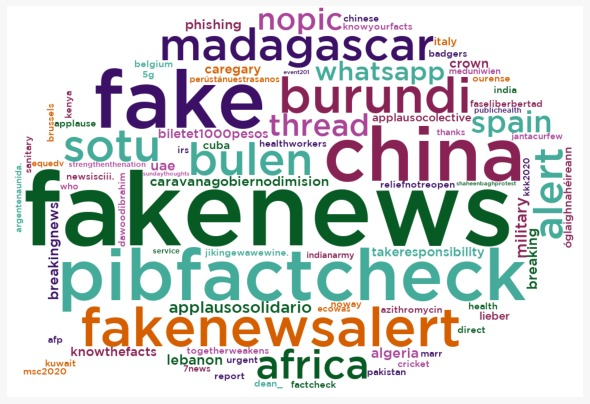